# Part B: Regression Problem

* **Name** Acharya Atul
* **Matriculation Number** U1923502C
* **Email** atul001@e.ntu.edu.sg

# Question 3
>Model degradation is a common issue faced when deploying neural network models in the real
world. In typical coursework settings, you learn the ropes by experimenting on toy datasets, which
only offers a static snapshot of the situation. Real life problems, such as the analysis of factors
influencing HDB prices, have new data points coming in daily that might exhibit a different pattern
from older data points due to factors such as changes in government policy or market sentiments.
In such situations, models trained on older data points that differ greatly from the new data could
perform poorly. In the last part of this assignment, we will investigate whether this has happened.
<br><br>There are 2 datasets to work with: ‘HDB_price_prediction.csv’ and ‘HDB_price_prediction_old.csv’.
The latter is a subset of the former: both start from the same date but the latter ends on August
2021 while the former has data until August 2022. Both have the same set of training data (2020
and before) but the test data for the latter (i.e. ‘old test set’) is up till August 2021, while the test
set from the former has complete data from 2021, along with data till August 2022 (‘new test set’).

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Neccessary Imports

* **pandas** - Data analysis and manipulation
* **tensorflow** - Modeling neural networks and training them
* **matplotlib** - Plotting graphs
* **seaborn** - Plotting statistical distributions
* **numpy** - Manipulate arrays
* **graphviz** - Visualize Model Architecture

In [2]:
!pip install --upgrade tensorflow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Normalization, StringLookup, IntegerLookup
import graphviz
from keras.utils.vis_utils import plot_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator

2022-10-10 12:22:58.941376: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-10 12:22:59.132754: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-10-10 12:22:59.132848: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-10 12:22:59.168859: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to r

### Setting the seed for reproducability

>For this assignment we will be using 42 as the seed

In [3]:
# Setting the seed here is sufficient. 
# If you don't plan to use these starter code, make sure you add this cell.

SEED = 42

import os
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

import random 
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

### Read new dataset

In [4]:
new_df = pd.read_csv('../input/assignment/hdb_price_prediction.csv')
new_df.head()

,month,year,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
0,1,2017,406 ANG MO KIO AVENUE 10,Ang Mo Kio,1.007264,7.006044,0.016807,0.006243,"2 ROOM, Improved",61.333333,44.0,10 TO 12,232000.0
1,1,2017,108 ANG MO KIO AVENUE 4,Ang Mo Kio,1.271389,7.983837,0.016807,0.006243,"3 ROOM, New Generation",60.583333,67.0,01 TO 03,250000.0
2,1,2017,602 ANG MO KIO AVENUE 5,Yio Chu Kang,1.069743,9.090700,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,262000.0
3,1,2017,465 ANG MO KIO AVENUE 10,Ang Mo Kio,0.946890,7.519889,0.016807,0.006243,"3 ROOM, New Generation",62.083333,68.0,04 TO 06,265000.0
4,1,2017,601 ANG MO KIO AVENUE 5,Yio Chu Kang,1.092551,9.130489,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,265000.0


### Read old dataset

In [5]:
old_df = pd.read_csv('../input/assignment/hdb_price_prediction_old.csv')
old_df.head()

,month,year,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
0,1,2017,406 ANG MO KIO AVENUE 10,Ang Mo Kio,1.007264,7.006044,0.016807,0.006243,"2 ROOM, Improved",61.333333,44.0,10 TO 12,232000.0
1,1,2017,108 ANG MO KIO AVENUE 4,Ang Mo Kio,1.271389,7.983837,0.016807,0.006243,"3 ROOM, New Generation",60.583333,67.0,01 TO 03,250000.0
2,1,2017,602 ANG MO KIO AVENUE 5,Yio Chu Kang,1.069743,9.090700,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,262000.0
3,1,2017,465 ANG MO KIO AVENUE 10,Ang Mo Kio,0.946890,7.519889,0.016807,0.006243,"3 ROOM, New Generation",62.083333,68.0,04 TO 06,265000.0
4,1,2017,601 ANG MO KIO AVENUE 5,Yio Chu Kang,1.092551,9.130489,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,265000.0


### Functions to create our dataset and encode features

In [6]:
# The functions in this cell are adapted from https://keras.io/examples/structured_data/structured_data_classification_from_scratch/
# It is the same link as the one mentioned in the question paper (Q1b)

def dataframe_to_dataset(dataframe, shuffle=False):
    dataframe = dataframe.copy()
    labels = dataframe.pop("resale_price")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="binary") # NOTE: as mentioned in the question paper, this actually does one-hot encoding. You could replace 'binary' with 'one_hot' if you wish to.

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature


### Function to compute $R^2$ score
>$R^2 = 1 - \dfrac{\Sigma_i(y_i - \hat{y_i})} {\Sigma_i(y_i - \bar{y_i})}$

In [7]:
from keras import backend as K

def r2(y_true, y_pred): 
    '''
    # Obtained from https://jmlb.github.io/ml/2017/03/20/CoeffDetermination_CustomMetric4Keras/
    # TODO: you have to find out how to use it in your code
    '''
    SS_res = K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

### Split Datastet
>**Old Test Set**: Year 2021 till August<br>
**New Test Set 2021**: Year 2021<br>
**New Test Set 2022**: Year 2022 till August

The test dataset has been batched for faster inference time

In [8]:
# Split data

old_test_df = old_df[old_df['year'] > 2020]

new_test_df = new_df[new_df['year'] > 2020]
new_test_df_2021 = new_test_df[new_test_df['year'] == 2021]
new_test_df_2022 = new_test_df[new_test_df['year'] == 2022]

old_test_ds = dataframe_to_dataset(old_test_df, shuffle=False)
new_test_ds = dataframe_to_dataset(new_test_df, shuffle=False)
new_test_ds_2021 = dataframe_to_dataset(new_test_df_2021, shuffle=False)
new_test_ds_2022 = dataframe_to_dataset(new_test_df_2022, shuffle=False)

old_test_ds = old_test_ds.batch(256)
new_test_ds_2021 = new_test_ds_2021.batch(256)
new_test_ds_2022 = new_test_ds_2022.batch(256)
new_test_ds = new_test_ds.batch(256)

train_df = new_df[new_df['year'] <= 2020]
train_ds = dataframe_to_dataset(train_df)
train_ds = train_ds.batch(256)

2022-10-10 12:23:05.334593: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-10-10 12:23:05.334638: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-10 12:23:05.334662: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (5aad0ae3672b): /proc/driver/nvidia/version does not exist
2022-10-10 12:23:05.335161: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the

### Best set of hyperparameter values obtained from hyperparameter tuning

In [9]:
best_divisor = 2
best_hidden_size = 16
best_learning_rate = 0.06805250998340012

### Defintion of Model Architecture

In [10]:
def create_model():

    # Categorical features encoded as integers
    month = keras.Input(shape=(1,), name="month", dtype="int64")
    month_encoded = encode_categorical_feature(month, "month", train_ds, False)
    
    # Categorical feature encoded as string
    flat_model_type = keras.Input(shape=(1,), name="flat_model_type", dtype="string")
    storey_range = keras.Input(shape=(1,), name="storey_range", dtype="string")

    flat_model_type_encoded = encode_categorical_feature(flat_model_type, "flat_model_type", train_ds, True)
    storey_range_encoded = encode_categorical_feature(storey_range, "storey_range", train_ds, True)

    # Numerical features
    dist_to_nearest_stn = keras.Input(shape=(1,), name="dist_to_nearest_stn")
    floor_area_sqm = keras.Input(shape=(1,), name="floor_area_sqm")
    dist_to_dhoby = keras.Input(shape=(1,), name="dist_to_dhoby")
    degree_centrality = keras.Input(shape=(1,), name="degree_centrality")
    eigenvector_centrality = keras.Input(shape=(1,), name="eigenvector_centrality")
    remaining_lease_years = keras.Input(shape=(1,), name="remaining_lease_years")

    dist_to_nearest_stn_encoded = encode_numerical_feature(dist_to_nearest_stn, "dist_to_nearest_stn", train_ds)
    floor_area_sqm_encoded = encode_numerical_feature(floor_area_sqm, "floor_area_sqm", train_ds)
    dist_to_dhoby_encoded = encode_numerical_feature(dist_to_dhoby, "dist_to_dhoby", train_ds)
    degree_centrality_encoded = encode_numerical_feature(degree_centrality, "degree_centrality", train_ds)
    eigenvector_centrality_encoded = encode_numerical_feature(eigenvector_centrality, "eigenvector_centrality", train_ds)
    remaining_lease_years_encoded = encode_numerical_feature(remaining_lease_years, "remaining_lease_years", train_ds)

    all_inputs = [
        month,
        storey_range,
        flat_model_type,
        floor_area_sqm,
        remaining_lease_years,
        degree_centrality,
        eigenvector_centrality,
        dist_to_nearest_stn,
        dist_to_dhoby,
    ]

    #Embedding to categorical features
    # Categorical features encoded as integers
    month_encoded = encode_categorical_feature(month, "month", train_ds, False)
    month_embedding = layers.Embedding(int(len(np.unique(train_df['month']))+1), int(np.floor((len(np.unique(train_df['month']))+1)/best_divisor)))(month_encoded)
    month_flatten = layers.Flatten()(month_embedding)

    #Categorical feature encoded as string
    flat_model_type_encoded = encode_categorical_feature(flat_model_type, "flat_model_type", train_ds, True)
    flat_model_type_embedding = layers.Embedding(int(len(np.unique(train_df['flat_model_type']))+1), int(np.floor((len(np.unique(train_df['flat_model_type']))+1)/best_divisor)))(flat_model_type_encoded)
    flat_model_type_flatten = layers.Flatten()(flat_model_type_embedding)

    storey_range_encoded = encode_categorical_feature(storey_range, "storey_range", train_ds, True)
    storey_range_embedding = layers.Embedding(int(len(np.unique(train_df['storey_range']))+1), int(np.floor((len(np.unique(train_df['storey_range']))+1)/best_divisor)))(storey_range_encoded)
    storey_range_flatten = layers.Flatten()(storey_range_embedding)

    concat_features= layers.concatenate(
        [
            month_flatten,
            flat_model_type_flatten,
            storey_range_flatten,
            floor_area_sqm_encoded,
            dist_to_dhoby_encoded,
            dist_to_nearest_stn_encoded,
            degree_centrality_encoded,
            eigenvector_centrality_encoded, 
            remaining_lease_years_encoded
        ]
    )


    hidden_layer = layers.Dense(best_hidden_size, activation="relu")(concat_features)
    dense_layer = layers.Dense(1, activation="linear")(hidden_layer)
    model = keras.Model(all_inputs, dense_layer)
    opt=keras.optimizers.Adam(learning_rate=best_learning_rate)
    model.compile(optimizer=opt, loss='mse', metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.RootMeanSquaredError(), r2])
    
    return model

### Load weights of best model

In [11]:
checkpoint_path = '../input/assignment/checkpoint/checkpoint/'

model = create_model()
model.load_weights(checkpoint_path)

### Plot Model Architecture

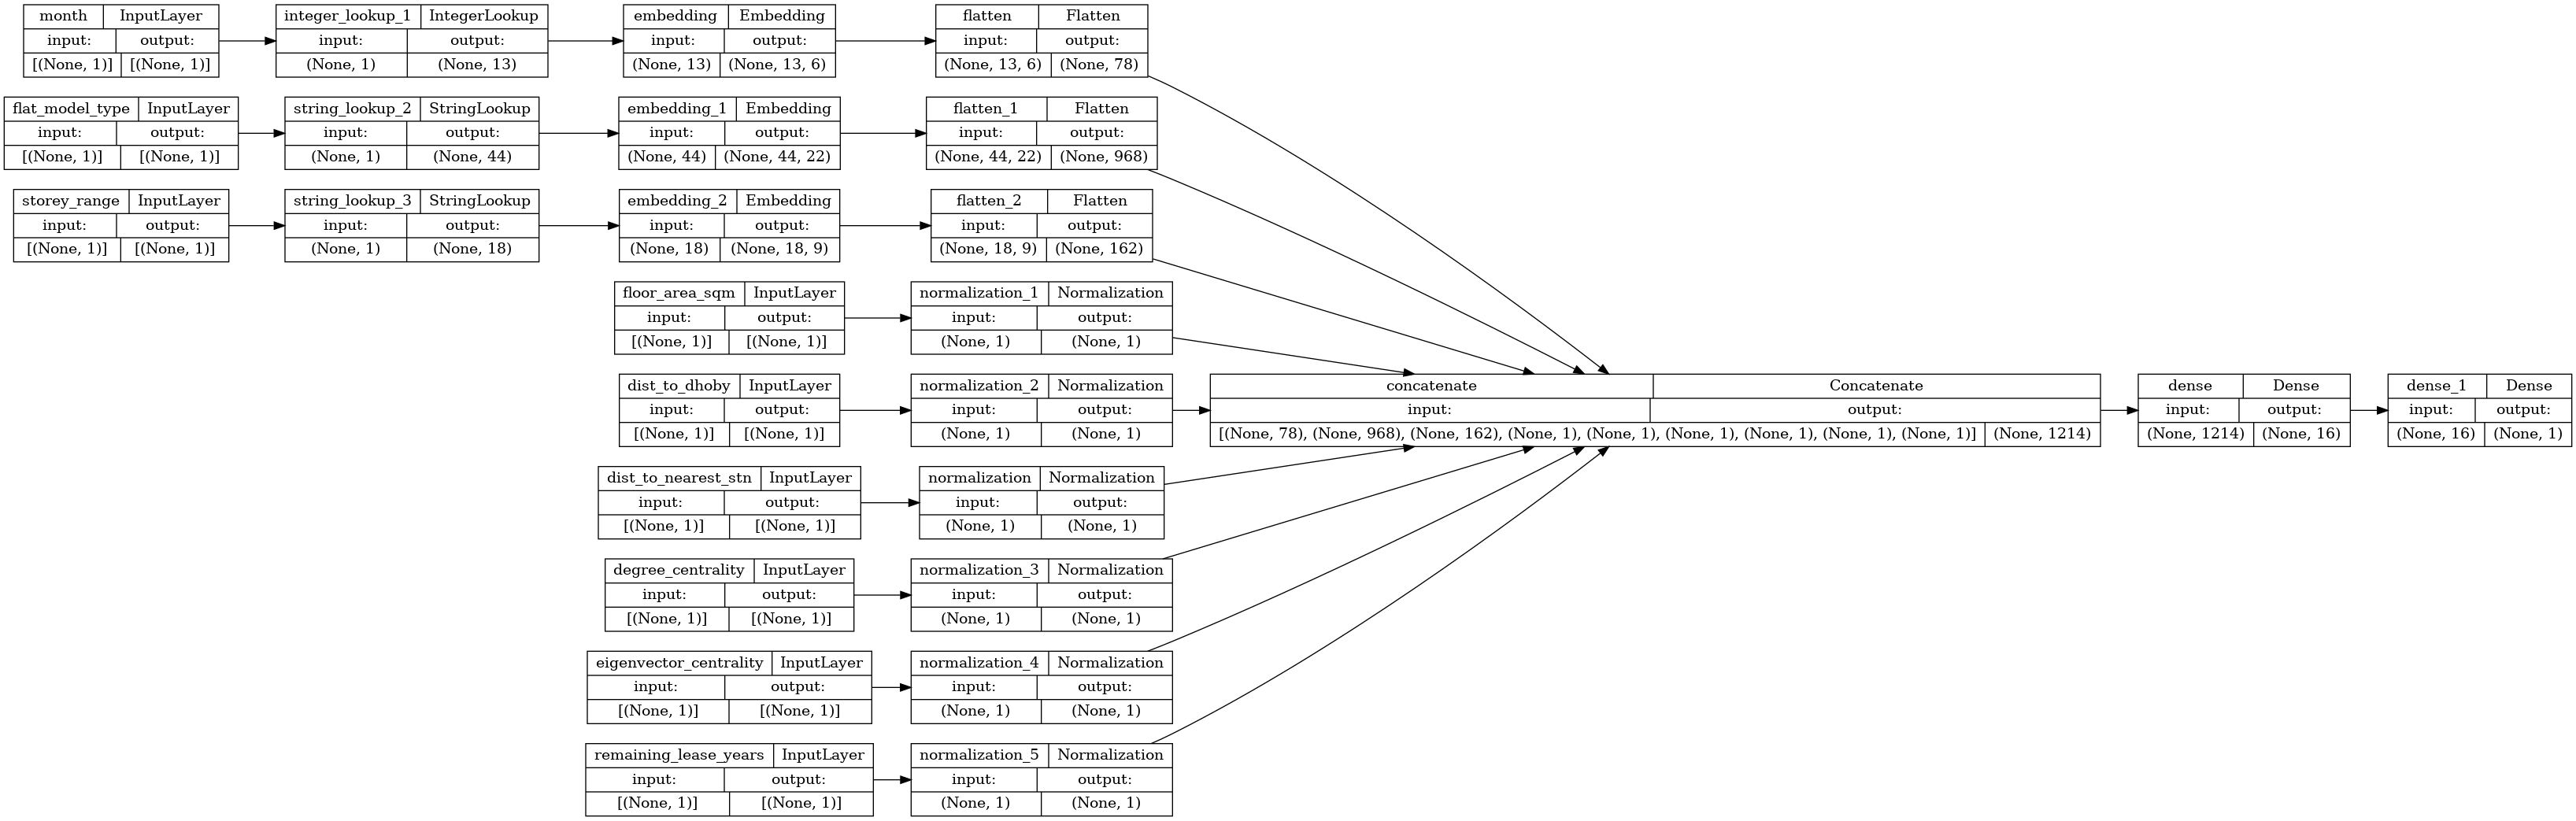

In [12]:
plot_model(model, show_shapes=True, rankdir="LR")

## Part A
>Apply your model from Q2d on the ‘old test set’. On the ‘new test set’, split
it into 2021 and 2022. For all 3 test sets, report the test R2 value you obtained. 

### Function to predict on dataset and report $R^2$ score

In [13]:
def predict_r2(dataset):
    target = np.concatenate([y for x, y in dataset], axis=0)
    target = np.expand_dims(target, axis=1)
    predicted = model.predict(dataset, verbose=0)
    return r2(tf.convert_to_tensor(np.double(target)), tf.convert_to_tensor(np.double(predicted)))

### $R^2$ values of the 3 test sets

In [14]:
old_test_r2 = predict_r2(old_test_ds).numpy()
new_test_r2_2021 = predict_r2(new_test_ds_2021).numpy()
new_test_r2_2022 = predict_r2(new_test_ds_2022).numpy()

print(f'Old Test set R2  : {old_test_r2}')
print(f'Test set 2021 R2 : {new_test_r2_2021}')
print(f'Test set 2022 R2 : {new_test_r2_2022}')

Old Test set R2  : 0.8442072272037434
Test set 2021 R2 : 0.809244814067665
Test set 2022 R2 : 0.5855196217693206


## Part B
>The team that produced the linear regression model shared with you their
results (test R2 values): 0.76 on the old test set, 0.715 when only using 2021
data as test set and 0.464 when only using 2022 data as test set.
In light of this (along with their result in Q1b and your results from Q3a),
compare the extent to which model degradation has impacted your model to
that of the team’s linear regression model and explain why this has occurred.

### Comparison with scientists

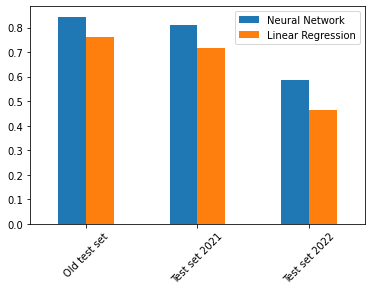

In [15]:
neural_network_r2 = [old_test_r2, new_test_r2_2021, new_test_r2_2022]

linear_regression_r2 = [0.76, 0.715, 0.464]
index = ['Old test set', 'Test set 2021', 'Test set 2022']
df = pd.DataFrame({'Neural Network': neural_network_r2,
                   'Linear Regression': linear_regression_r2}, index=index)
ax = df.plot.bar(rot=45)

Our model performs better than the Linear Regression model developed by the scientists. This is because a neural network learns better features and has a better performance on this task.

However, just like the Linear Regression model, the neural network starts to perform worse and worse as the year increases. As the year increases and new datapoints are added into the test set, the model performs much worse. 

This could be because the distribution of data could have changed. The distribution could have changed due to various factors such as government policy or market sentiments as mentioned in the question. These external factors impact our features and our model is not able to adapt to the changing data.

## Part C
>Model degradation could be caused by various data distribution shifts2
:
covariate shift (features), label shift and/or concept drift (altered relationship
between features and labels). Recall that machine learning models generally
need the test data distribution to be similar to the training data distribution.
With appropriate plots, visualise the distributions of all the features and labels
used by the model. Which variable(s) showed the largest covariate/label shift
that might have led to the drop in model performance as seen in Q3b? With
these insights, suggest a way to address the problem of model degradation.
(Note: Only include plots relevant to your answer. Do not include all plots.)

### Saving column names

In [16]:
numerical_features = ['dist_to_nearest_stn', 'floor_area_sqm', 'dist_to_dhoby', 'degree_centrality', 'eigenvector_centrality', 'remaining_lease_years']
categorical_features = ['month', 'flat_model_type', 'storey_range']

### Plots to understand distribution of categorical variables

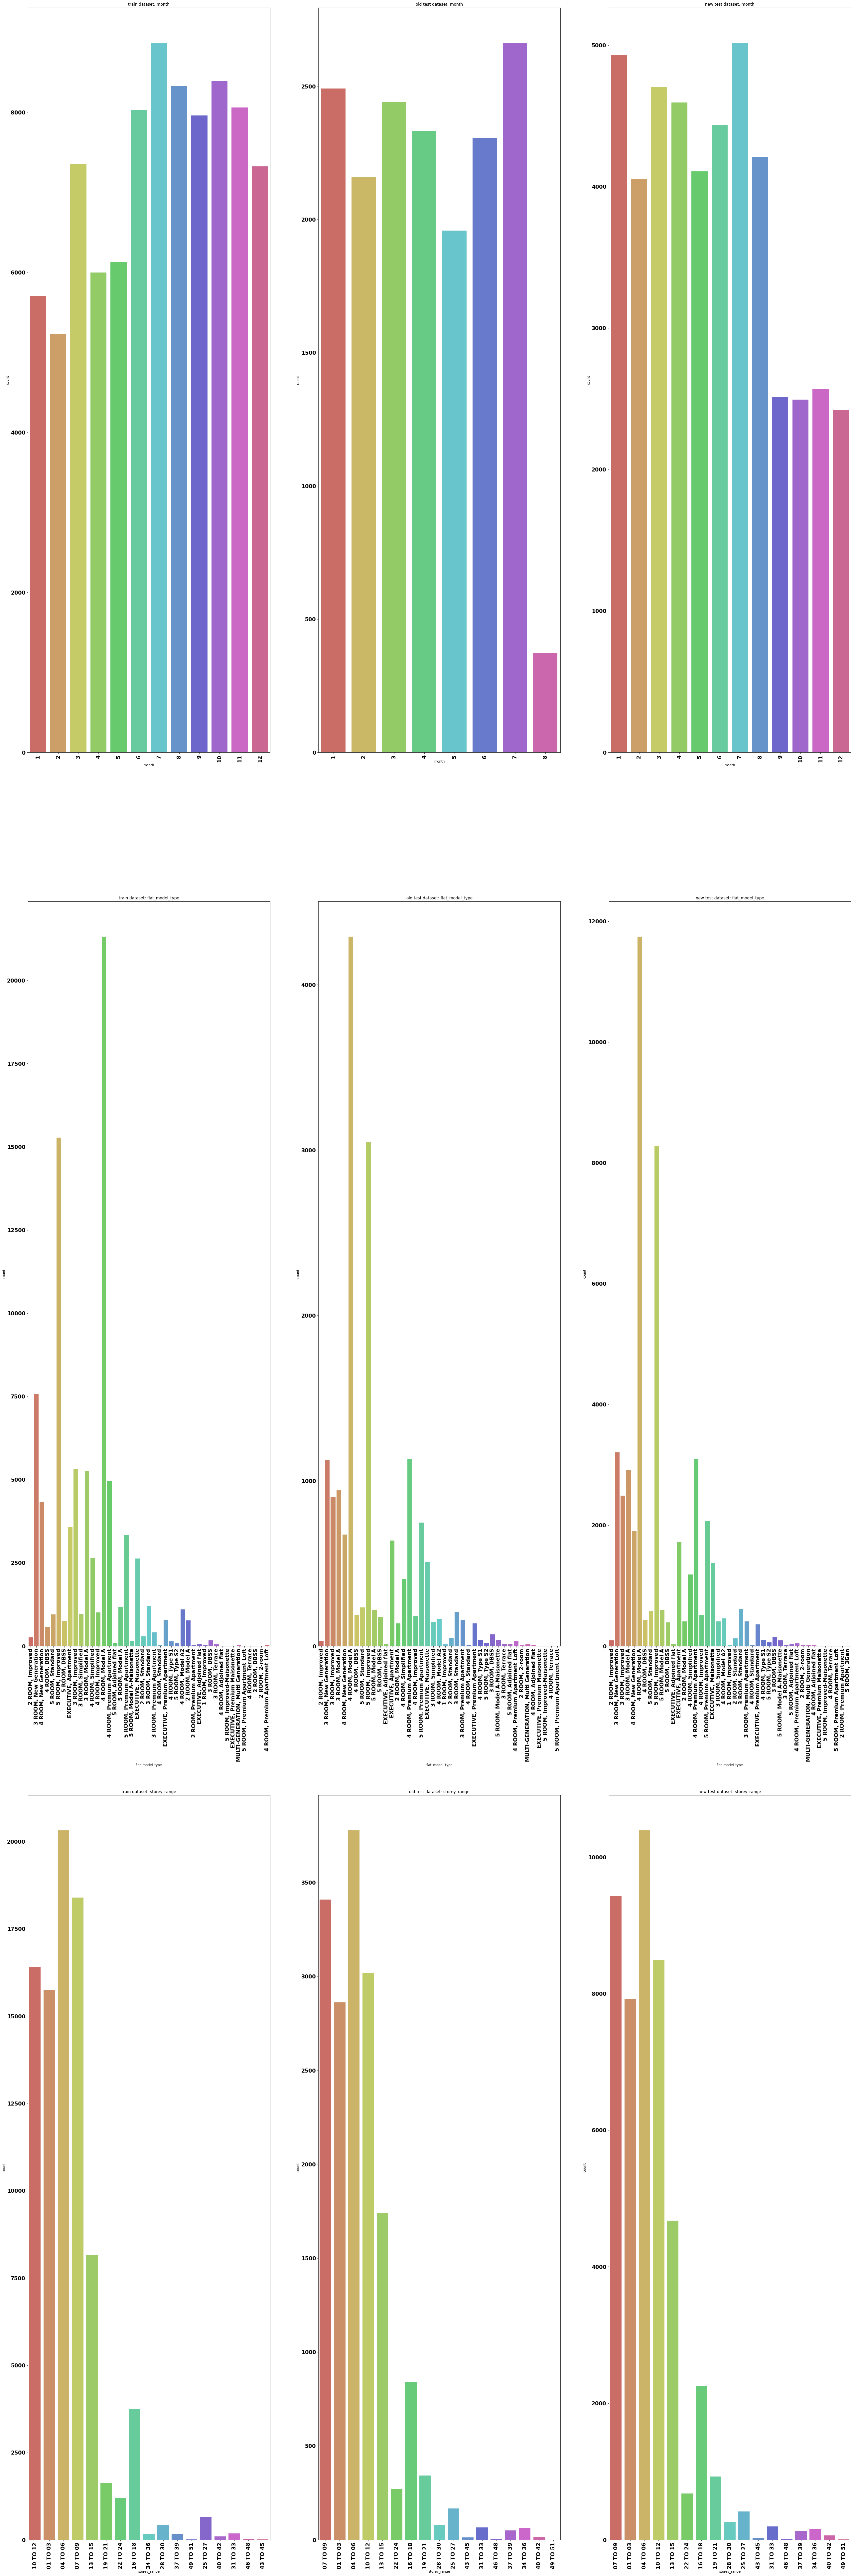

In [17]:
font = {'weight': 'bold', 'size':16}

datasets = [train_df, old_test_df, new_test_df]
dataset_names = ['train dataset', 'old test dataset', 'new test dataset']

plt.figure(figsize=(60,140))
for x, cat_feat in enumerate(categorical_features):
    for idx, df in enumerate(datasets):
        plt.subplot(3, 4, x*4 + idx+1)
        ax = sb.countplot(df[cat_feat], palette='hls')
        plt.xticks(**font)
        plt.yticks(**font)
        plt.xlabel(cat_feat)
        plt.title(f'{dataset_names[idx]}: {cat_feat}')
        plt.xticks(rotation=90)

plt.show()

### Observations
* The distribution of the feature *flat_model_type* has changed which can cause covariate shift

### Plots to understand the distribution of numeric features

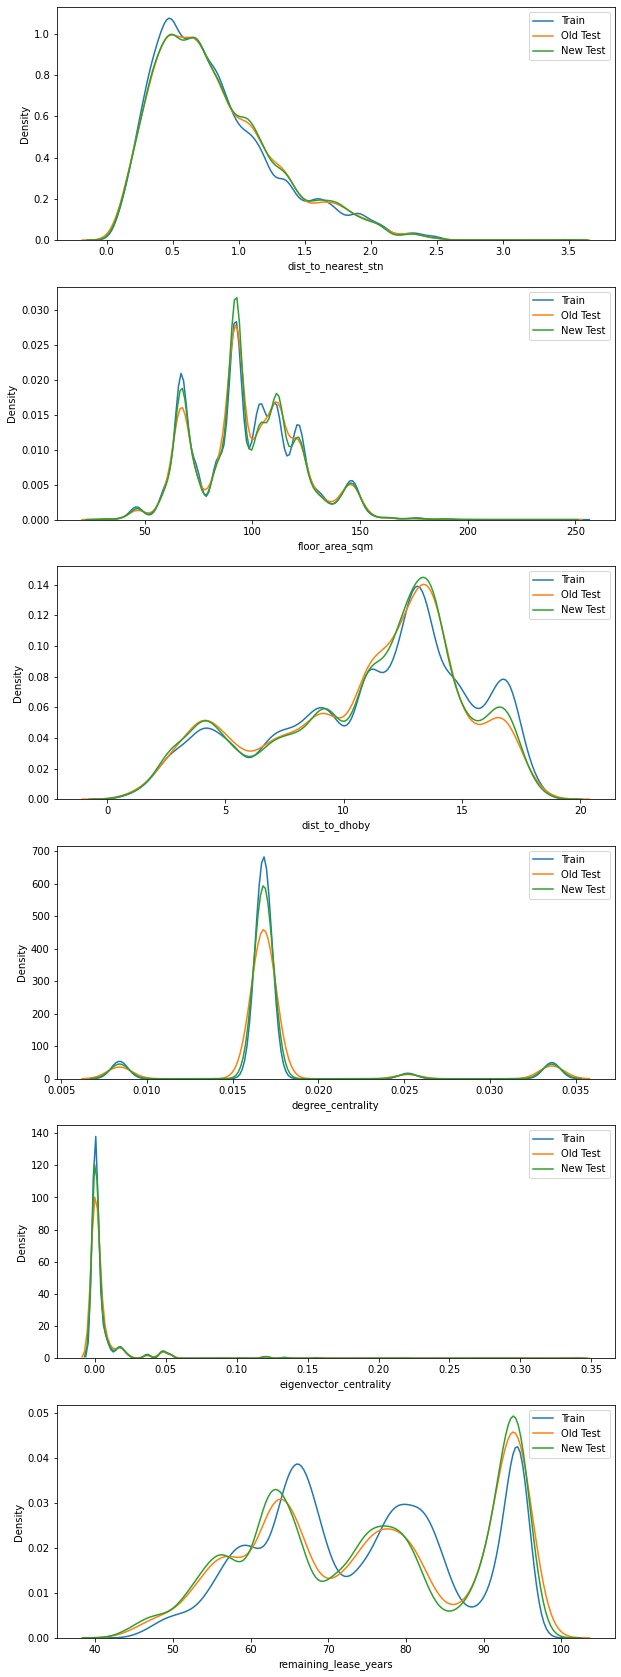

In [18]:
plt.figure(figsize=(10,30))

for idx, num_feat in enumerate(numerical_features):
    plt.subplot(6, 1, idx+1)    

    sb.distplot(train_df[num_feat], hist=False)
    sb.distplot(old_test_df[num_feat], hist=False)
    sb.distplot(new_test_df[num_feat], hist=False)
    plt.legend(['Train', 'Old Test', 'New Test'], loc='upper right')
    
plt.show()

### Observations
* The distribution of *remaining_lease_years* has changed and its as if it underwent a phase shift. $P(X)$ has changed for this variable and it has most likely undergone a covariate shit. This is because $P(Y|X)$ is expected to remain the same since logically one could say that higher the lease years, higher the resale price 
* The distributions of *degree_centrality* and *eigenvector_centrality* do not change. The mean and variance appear to be the same and $P(X)$ seems to remain the same. However, since the model is starting to perform badly, there could be a possibility that $P(Y|X)$ has changed which would imply that a concept shift has occured.
* Its hard to infer anything else from the other density plots

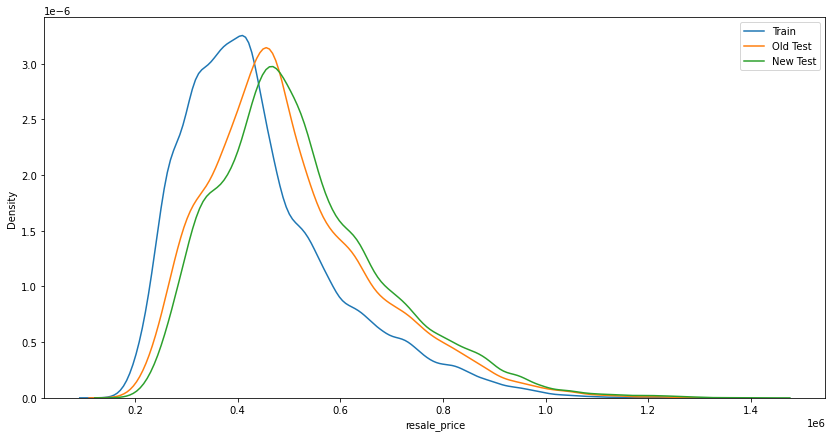

In [19]:
plt.figure(figsize=(14, 7))

sb.distplot(train_df['resale_price'], hist=False)
sb.distplot(old_test_df['resale_price'], hist=False)
sb.distplot(new_test_df['resale_price'], hist=False)
plt.legend(['Train', 'Old Test', 'New Test'], loc='upper right')

plt.show()

### Observations
* The mean target variable is increasing as we use the latest datasets. This means that the resale prices of the houses are increasing every year and this implies $P(Y)$ has changed in the test set

### Plots to understand the relationship between the target variable and the features

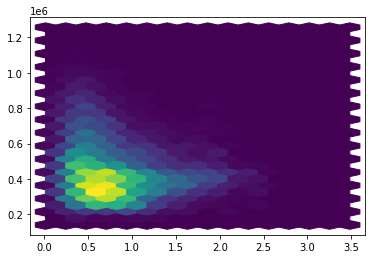

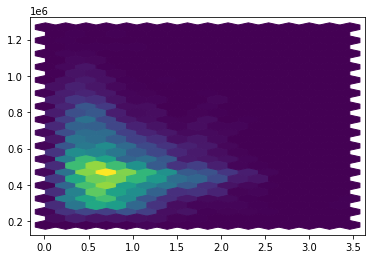

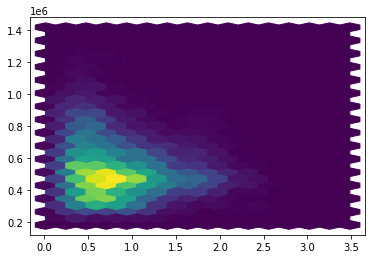

In [20]:
plt.hexbin(train_df['dist_to_nearest_stn'], train_df['resale_price'], gridsize=(15,15) )
plt.show()

plt.hexbin(old_test_df['dist_to_nearest_stn'], old_test_df['resale_price'], gridsize=(15,15) )
plt.show()

plt.hexbin(new_test_df['dist_to_nearest_stn'], new_test_df['resale_price'], gridsize=(15,15) )
plt.show()

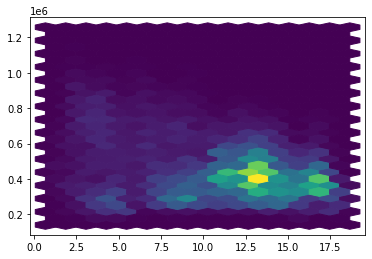

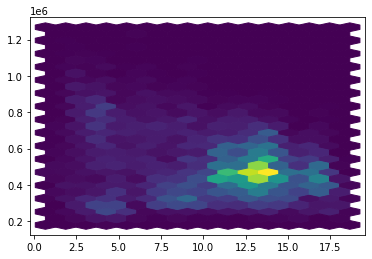

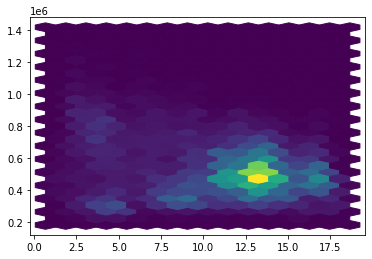

In [21]:
plt.hexbin(train_df['dist_to_dhoby'], train_df['resale_price'], gridsize=(15,15) )
plt.show()

plt.hexbin(old_test_df['dist_to_dhoby'], old_test_df['resale_price'], gridsize=(15,15) )
plt.show()

plt.hexbin(new_test_df['dist_to_dhoby'], new_test_df['resale_price'], gridsize=(15,15) )
plt.show()

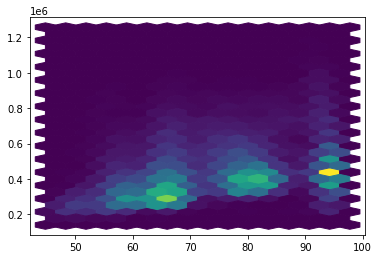

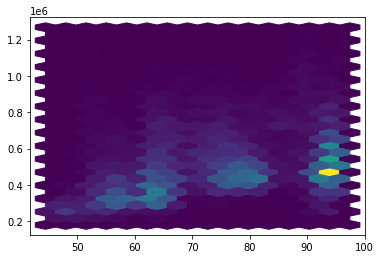

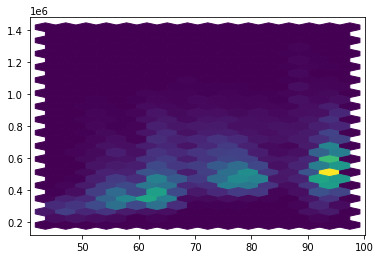

In [22]:
plt.hexbin(train_df['remaining_lease_years'], train_df['resale_price'], gridsize=(15,15) )
plt.show()

plt.hexbin(old_test_df['remaining_lease_years'], old_test_df['resale_price'], gridsize=(15,15) )
plt.show()

plt.hexbin(new_test_df['remaining_lease_years'], new_test_df['resale_price'], gridsize=(15,15) )
plt.show()

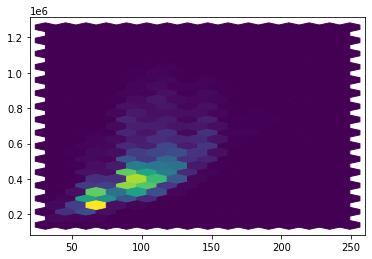

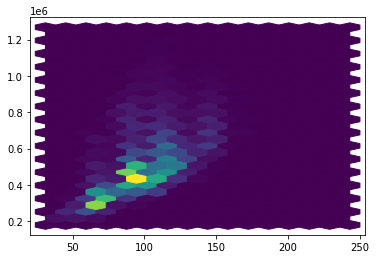

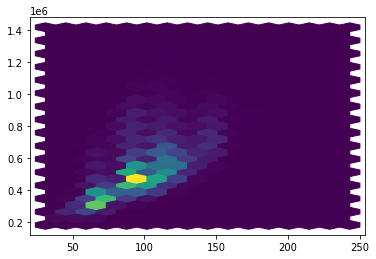

In [23]:
plt.hexbin(train_df['floor_area_sqm'], train_df['resale_price'], gridsize=(15,15) )
plt.show()

plt.hexbin(old_test_df['floor_area_sqm'], old_test_df['resale_price'], gridsize=(15,15) )
plt.show()

plt.hexbin(new_test_df['floor_area_sqm'], new_test_df['resale_price'], gridsize=(15,15) )
plt.show()

### Observations
* The prices of houses are increasing slightly for the same floor area. This means that there could be a label shift for this feature.
* It is hard to see any changes that the other variables went through

### Inference
* The variables *remaining_lease_years* went under the largest covariate shift and *floor_area_sqm* had some amount of label shift. Moreover, the distribution of *flat_model_type* changed causing some amount of covariate shift. 

### Addressing Model Degradation
* One solution is that we frequently maintain models and train with new data and deploy our models using the same process we used to build our models in the first place.
* Another solution could be to weight data and have them inversly proportional to the age of the training data. This makes older data less and less relevant as time progresses

## Part D
>The team passed you a script (‘RFE.py’) that recursively removes features
from a neural network, so as to find the best feature subset. Run this piece of
code with your model from Q2d and report the best feature subset obtained. 

### Input Layer Definition

In [24]:
# Categorical features encoded as integers
month = keras.Input(shape=(1,), name="month", dtype="int64")
month_encoded = encode_categorical_feature(month, "month", train_ds, False)

# Categorical feature encoded as string
flat_model_type = keras.Input(shape=(1,), name="flat_model_type", dtype="string")
storey_range = keras.Input(shape=(1,), name="storey_range", dtype="string")

flat_model_type_encoded = encode_categorical_feature(flat_model_type, "flat_model_type", train_ds, True)
storey_range_encoded = encode_categorical_feature(storey_range, "storey_range", train_ds, True)

# Numerical features
dist_to_nearest_stn = keras.Input(shape=(1,), name="dist_to_nearest_stn")
floor_area_sqm = keras.Input(shape=(1,), name="floor_area_sqm")
dist_to_dhoby = keras.Input(shape=(1,), name="dist_to_dhoby")
degree_centrality = keras.Input(shape=(1,), name="degree_centrality")
eigenvector_centrality = keras.Input(shape=(1,), name="eigenvector_centrality")
remaining_lease_years = keras.Input(shape=(1,), name="remaining_lease_years")

dist_to_nearest_stn_encoded = encode_numerical_feature(dist_to_nearest_stn, "dist_to_nearest_stn", train_ds)
floor_area_sqm_encoded = encode_numerical_feature(floor_area_sqm, "floor_area_sqm", train_ds)
dist_to_dhoby_encoded = encode_numerical_feature(dist_to_dhoby, "dist_to_dhoby", train_ds)
degree_centrality_encoded = encode_numerical_feature(degree_centrality, "degree_centrality", train_ds)
eigenvector_centrality_encoded = encode_numerical_feature(eigenvector_centrality, "eigenvector_centrality", train_ds)
remaining_lease_years_encoded = encode_numerical_feature(remaining_lease_years, "remaining_lease_years", train_ds)

all_inputs = [
    month,
    storey_range,
    flat_model_type,
    floor_area_sqm,
    remaining_lease_years,
    degree_centrality,
    eigenvector_centrality,
    dist_to_nearest_stn,
    dist_to_dhoby,
]

### Create input layer with Embeddings and Concatenate

In [25]:
def create_input_layer():

    #Embedding to categorical features
    # Categorical features encoded as integers
    month_encoded = encode_categorical_feature(month, "month", train_ds, False)
    month_embedding = layers.Embedding(int(len(np.unique(train_df['month']))+1), int(np.floor((len(np.unique(train_df['month']))+1)/best_divisor)))(month_encoded)
    month_flatten = layers.Flatten()(month_embedding)

    #Categorical feature encoded as string
    flat_model_type_encoded = encode_categorical_feature(flat_model_type, "flat_model_type", train_ds, True)
    flat_model_type_embedding = layers.Embedding(int(len(np.unique(train_df['flat_model_type']))+1), int(np.floor((len(np.unique(train_df['flat_model_type']))+1)/best_divisor)))(flat_model_type_encoded)
    flat_model_type_flatten = layers.Flatten()(flat_model_type_embedding)

    storey_range_encoded = encode_categorical_feature(storey_range, "storey_range", train_ds, True)
    storey_range_embedding = layers.Embedding(int(len(np.unique(train_df['storey_range']))+1), int(np.floor((len(np.unique(train_df['storey_range']))+1)/best_divisor)))(storey_range_encoded)
    storey_range_flatten = layers.Flatten()(storey_range_embedding)
    
    all_input_features = [
        month_flatten,
        storey_range_flatten,
        flat_model_type_flatten,
        floor_area_sqm,
        remaining_lease_years,
        degree_centrality,
        eigenvector_centrality,
        dist_to_nearest_stn,
        dist_to_dhoby,
    ]
    
    return all_input_features

### Recursive Feature Elimination

In [26]:
import time
start = time.time()

num_features = 9

vec = [1 for i in range(num_features)]
best_loss = 1e15
new_best_loss = 1e14
which_iter = ''

all_losses = [] # should be len 9,8,7,...

feature_names = [
    'month',
    'storey_range',
    'flat_model_type',
    'floor_area_sqm',
    'remaining_lease_years',
    'degree_centrality',
    'eigenvector_centrality', 
    'dist_to_nearest_stn',
    'dist_to_dhoby'
]

scores = {}


def train_model(feature_mask):
    """
    Given a boolean mask (feature_mask), select the features accordingly, train the model and return the validation loss.
    """
    key_strings = []
    feature_mask_string = ''.join([str(i) for i in feature_mask])
    
    # TODO: define the input layer here (your code from Q2)
    all_features_input = create_input_layer()
    
    selected_inputs = []
    print('going through feature_mask', feature_mask)
    for idx, (i,j) in enumerate(zip(all_features_input, feature_mask)):
        if j == 1:
            selected_inputs.append(i)
            print(i)
        else:
            key_strings.append(feature_names[idx])
            print('Skipping', i)
    
    all_features = layers.concatenate(selected_inputs)
    
    # TODO: Complete the rest of the architecture + training code and retrieve the training history
    hidden_layer = layers.Dense(best_hidden_size, activation="relu")(all_features)
    dense_layer = layers.Dense(1, activation="linear")(hidden_layer)
    model = keras.Model(all_inputs, dense_layer)
    opt=keras.optimizers.Adam(learning_rate=best_learning_rate)
    model.compile(optimizer=opt, loss='mse', metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.RootMeanSquaredError()])
    
    history = model.fit(train_ds, epochs=50, validation_data=new_test_ds, verbose=0)
    
    val_loss_hx = history.history['val_loss'] # NOTE: You can use RMSE if you find it easier to interpret.
    val_loss_min = min(val_loss_hx)
    
    key_string = '-'.join(key_strings)
    scores[key_string] = val_loss_min
    return val_loss_min


## RFE starts here 

while sum(vec) > 0 and best_loss > new_best_loss:
    print('vec', vec)

    best_loss = new_best_loss
    new_min_loss_flag = False
    
    losses_from_same_vec = []
    
    for ix, i in enumerate(vec):
        
        print('ix', ix, 'i', i)
        
        if i == 0:
            continue # if the feature is off, no need to do anything, go to next position
        else:
            temp_vec = vec[:]
            temp_vec[ix] = 0 # turn off the feature
            print('updated temp_vec', temp_vec)
            
            loss = train_model(temp_vec)
            losses_from_same_vec.append(loss)
            
            if loss < new_best_loss:
                new_best_loss = loss
                which_iter = 'len ' + str(sum(vec)) + ', ix ' + str(ix)
                print('new min loss:', which_iter)
                new_min_loss_flag = True
                min_loss_vec = temp_vec[:]

            tf.keras.backend.clear_session()
            print('session cleared!\n')
                
    all_losses.append(losses_from_same_vec)
    
    # After going through the vec once, update vec if new min loss    
    if new_min_loss_flag:
        vec = min_loss_vec
    
    # else case means no new min loss, the latter while loop condition will cause it to terminate 
    print(time.time() - start, 'seconds elapsed')
    print()

print(all_losses)

vec [1, 1, 1, 1, 1, 1, 1, 1, 1]
ix 0 i 1
updated temp_vec [0, 1, 1, 1, 1, 1, 1, 1, 1]
going through feature_mask [0, 1, 1, 1, 1, 1, 1, 1, 1]
Skipping KerasTensor(type_spec=TensorSpec(shape=(None, 78), dtype=tf.float32, name=None), name='flatten_3/Reshape:0', description="created by layer 'flatten_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 162), dtype=tf.float32, name=None), name='flatten_5/Reshape:0', description="created by layer 'flatten_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 968), dtype=tf.float32, name=None), name='flatten_4/Reshape:0', description="created by layer 'flatten_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='floor_area_sqm'), name='floor_area_sqm', description="created by layer 'floor_area_sqm'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='remaining_lease_years'), name='remaining_lease_years', description="created by layer 'remaining_lease_years'")
KerasTensor(type_spec=TensorSpec(shape=(

### Get results of RFE

In [27]:
scores_df = pd.DataFrame()
scores_df['Features Removed'] = scores.keys()
scores_df['Loss'] = scores.values()
scores_df = scores_df.sort_values(['Loss'], ascending=True)
scores_df.head(len(scores))

,Features Removed,Loss
17,month-degree_centrality-eigenvector_centrality,5.493490e+09
14,degree_centrality-eigenvector_centrality,5.529275e+09
9,month-degree_centrality,5.707158e+09
10,storey_range-degree_centrality,5.725128e+09
5,degree_centrality,5.727296e+09
0,month,5.759675e+09
6,eigenvector_centrality,5.880137e+09
18,storey_range-degree_centrality-eigenvector_cen...,5.915609e+09
11,flat_model_type-degree_centrality,6.191924e+09
2,flat_model_type,6.376133e+09


In [28]:
worst_features = scores_df['Features Removed'].iloc[0]
worst_features_list = worst_features.split('-')
print(worst_features_list)

['month', 'degree_centrality', 'eigenvector_centrality']


In [29]:
best_subset = []

for feature in feature_names:
    if feature not in worst_features_list:
        best_subset.append(feature)
        
print(best_subset)

['storey_range', 'flat_model_type', 'floor_area_sqm', 'remaining_lease_years', 'dist_to_nearest_stn', 'dist_to_dhoby']


### Best feature Subset:
* storey_range
* flat_model_type
* floor_area_sqm
* remaining_lease_years
* dist_to_nearest_stn
* dist_to_dhoby

> The RFE algorithm on the new test set removed *month*, *degree_centrality* and *eigenvector_centrality*.

> From the table, we can see that when we removed *dist_to_dhoby* and *dist_to_nearest_stn* the loss increased by a lot indicating that these are the most important features. 

## Part E
>RFE on the ‘old test set’ eliminated features degree_centrality and month. It
also showed that dist_to_dhoby and dist_to_nearest_stn are crucial (removing
them leads to higher test loss). Compare these features to those in Q3d and
discuss whether concept drift has occurred. 

When RFE was run on the old test set and the new test set, the algorithm removed *month* and *degree_centrality*.
<br>
However, the alogrithm removed *eigenvector_centrality* when run on the new test set. This could indicate that concept drift might have occured and the variable *eigenvector_centrality* is no longer a good predictor but degrades our model.

### Statistics of *eigenvector_centrality*

In [30]:
print(f'Train Mean: {train_df["eigenvector_centrality"].mean()}, Train Std Dev: {train_df["eigenvector_centrality"].std()}')
print(f'Old Test Mean: {old_test_df["eigenvector_centrality"].mean()}, Old Test Std Dev: {old_test_df["eigenvector_centrality"].std()}')
print(f'New Test Mean: {new_test_df["eigenvector_centrality"].mean()}, New Test Std Dev: {new_test_df["eigenvector_centrality"].std()}')

Train Mean: 0.006544384176630657, Train Std Dev: 0.020758447709573732
Old Test Mean: 0.006819031795263166, Old Test Std Dev: 0.02093028909731968
New Test Mean: 0.006721953909339524, New Test Std Dev: 0.02074946714834093


Concept drift is when $P(Y|X)$ changes, but $P(X)$ remains the same.<br>
As we can see the mean and standard deviation remain almost the same which implies $P(X)$ remains same but removing this feature helps to improve loss. This means that $P(Y|X)$ is different in the new test set and hence concept drift has occurred.